### CODIGO.py

In [ ]:
# Importación de paquetes importante para el despliegue
import pandas as pd
import seaborn as sns

# Definición de la ruta con el archivo de trabajo
synergy = pd.read_csv("/content/drive/MyDrive/data-science-proyecto2-master/synergy_logistics_database.csv",index_col='register_id')

### RUTAS DE IMPORTACIÓN Y EXPORTACIÓN
# Invocación y creación del dataframe, renombrar ultima columna
# Importación
rutasUnicasImpor = synergy.groupby(['direction','origin','destination','transport_mode']).count()
rutasUnicasImpor = rutasUnicasImpor.rename(columns={'total_value':'Cant. Total'})
# Exportación
rutasUnicasExpor = synergy.groupby(['direction','origin','destination','transport_mode']).sum()
rutasUnicasExpor = rutasUnicasExpor.rename(columns={'total_value':'$ Total'})
# Ordenar los valores de mayor a menor
rutasUnicasImpor = rutasUnicasImpor.sort_values(by='Cant. Total', ascending=True)
rutasUnicasExpor = rutasUnicasExpor.sort_values(by='$ Total', ascending=False)

# Tomar solo las exportaciones o importaciones
rutasImpor = rutasUnicasImpor.xs('Imports')
rutasExpor = rutasUnicasExpor.xs('Exports')
# Se agrega nueva columna con el nombre para uso en la gráfica
rutasImpor['Rutas'] = rutasImpor.index.to_list()
rutasExpor['Rutas'] = rutasExpor.index.to_list()
# Función para concatenar nueva columna con el nombre.
def nombre_bueno(lista):
  nombre = f"{lista[0]} a {lista[1]}"
  return nombre
# Inserción de la nueva columna con valores.
rutasImpor['Rutas'] = rutasImpor['Rutas'].apply(nombre_bueno)
rutasExpor['Rutas'] = rutasExpor['Rutas'].apply(nombre_bueno)

### MEDIO DE TRANSPORTE UTILIZADO
# Extracción de variables para análisis de transporte
synergyTransp = synergy[['transport_mode','direction',	'total_value']]
# Renombrar las columnas para facilitar comprensión
synergyTransp = synergyTransp.rename(columns={'transport_mode':'Medio de Transp','direction':'Tipo','total_value':'Total'})

### VALOR TOTAL DE IMPORTACIONES Y EXPORTACIONES
# Extracción de variables para análisis de transporte
synergyValTotal = synergy[['direction','origin','total_value']]
synergyValTotal = synergyValTotal.groupby(['direction','origin']).agg({'total_value':'sum'})
synergyValTotal = synergyValTotal.sort_values(by='total_value', ascending=False)
synergyValTotalImpor = synergyValTotal.xs('Imports')
synergyValTotalExpor = synergyValTotal.xs('Exports')
# Importaciones
synergyValTotalImpor = pd.DataFrame(synergyValTotalImpor, columns=['total_value'])
synergyValTotalImpor['%']=(synergyValTotalImpor['total_value'] / synergyValTotalImpor['total_value'].sum())*100
# Exportaciones
synergyValTotalExpor = pd.DataFrame(synergyValTotalExpor, columns=['total_value'])
synergyValTotalExpor['%']=(synergyValTotalExpor['total_value'] / synergyValTotalExpor['total_value'].sum())*100

## Informe Synergy Logistics

El documento que se presenta a continuación expone las estrategias resultantes del análisis llevado a cabo en el marco del proyecto de la empresa “Synergy Logistics”, la base parte del análisis de la viabilidad de 3 ejes:

*   Rutas de importación y exportación.
*   Medios de transporte utilizados.
*   Valor total de importaciones y exportaciones.

Con el fin de identificar la mejor opción se incluyen gráficos en cada apartado del documento, además de conclusiones finales que abordan el análisis específicos que da soporte a las estrategias presentadas.

### Rutas de importación y exportación
Partiendo de la definición de **Demanda** como la cantidad de servicios que son solicitados a diferente costo, planteamos una estrategia donde se tome para cada uno de los ejes expuestos; en las **exportaciones** el **total de ingresos obtenidos** y para las **importaciones** el **número de transacciones realizadas.**

**Rutas de exportación**
(Top 5 con los más altos *indices de ingreso* de mayor a menor)

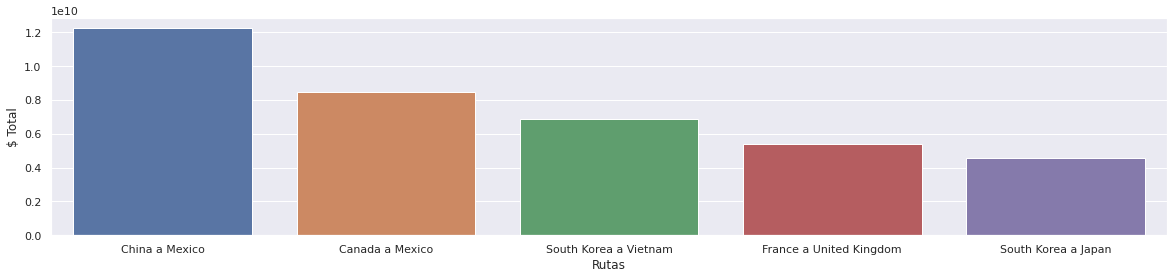

In [ ]:
# Despliegue de la gráfica.
sns.set(rc={"figure.figsize": (20, 4)}) 
sns.barplot(data=rutasExpor.head(5), x='Rutas', y='$ Total')

Se recomienda mantener las rutas de exportación que generan mayor ingreso; siendo China a México, Canada a México y Korea del Sur a Vietnam las primeras tres con mayor ingreso a favor. Es importante ampliar la capacidad de exportación en las rutas mencionadas.

**Rutas de importación**
(Top 5 con los de *menor cantidad demandada* de menor a mayor)

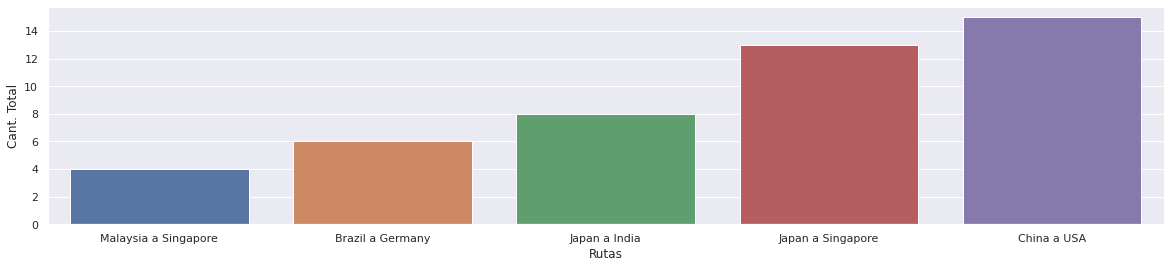

In [ ]:
# Despliegue de la gráfica.
sns.set(rc={"figure.figsize": (20, 4)}) 
sns.barplot(data=rutasImpor.head(5), x='Rutas', y='Cant. Total')

Se recomienda descartar la compra de los insumos provenientes de las rutas de importación con la menor cantidad de transacciones; siendo Malaysia a Singapore, Brazil a Alemania y Japón a India las tres con menor volúmen. Es  importante determinar si son productos de primera necesidad de lo contrario sería necesario evaluar el reinvertir el recurso en otros de mayor demanda.

###Medio de transporte utilizado.
En este análisis se requirió clasificar las exportaciones e importaciones de cada medio de transporte con su respectivo valor monetario a fin de facilitar la vista macro del comportamiento de cada uno. En la gráfica podemos ver el total de exportaciones e importaciones de los medios de transporte ocupados.

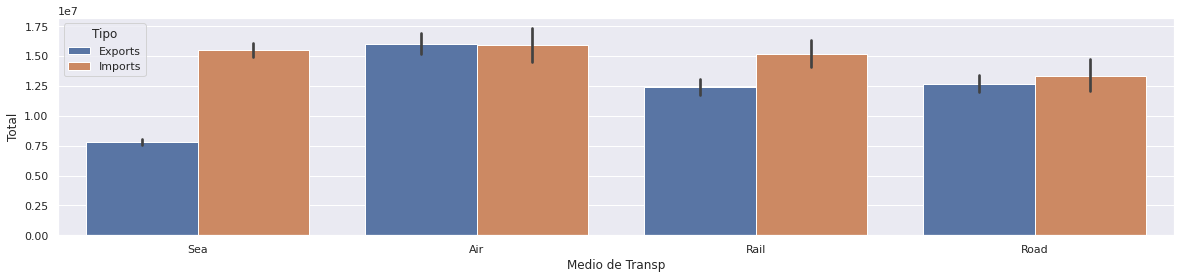

In [ ]:
# Despliegue de la gráfica.
sns.set(rc={"figure.figsize": (20, 4)})
sns.barplot(x="Medio de Transp", y="Total", hue="Tipo", data=synergyTransp)

Se recomienda como estratégia fortalecer los lazos que hay con los proveedores de servicios por aire y carretera, estableciendo convenios o contratos que permitan reducir costos por volumen o tener mejores condiciones en el servicio que brindan. Tambien se recomienda evaluar el medio de transporte marítimo ya que el nivel de exportaciones es el más bajo en comparación con los demás.

## Valor total de importaciones y exportaciones.
Los países que representan el 80% tanto de exportaciones como de importaciones se presentan en las siguientes tablas:

**Total de importaciónes**

In [ ]:
# Despliegue de la gráfica.
synergyValTotalImpor.head(8)

,total_value,%
origin,,
China,12233000000,22.030327
Japan,8094000000,14.576430
USA,5291000000,9.528526
Mexico,4621000000,8.321928
Germany,4250000000,7.653796
Singapore,4017000000,7.234188
South Korea,3889000000,7.003674
Malaysia,3560000000,6.411180


**Total de exportaciónes**

In [ ]:
# Despliegue de la gráfica.
synergyValTotalExpor.head(8)

,total_value,%
origin,,
China,32977046000,20.589640
France,18614332000,11.622096
USA,18355306000,11.460370
South Korea,14621146000,9.128899
Russia,13223000000,8.255949
Japan,11948976000,7.460496
Germany,11343233000,7.082292
Canada,10684000000,6.670692


### Conclusión

Es importante diferenciar la variable de impacto estratégica que tienen tanto las exportaciones como las importaciones, ya que el monto total monetario vs la cantidad de transacciones realizadas puede definir el rumbo del negocio. En el caso analizado, se sostiene la premisa que el mercado no cambiará por lo que el plan de acción a realizar se basa en fortalecer los lazos con los proveedores de mayor impacto, así como enfocar esfuerzos en los países que representan el mayor índice de ingreso.